In [1]:
from skimage.io import imread,imsave,imshow
from skimage.color import rgb2hsv
from matplotlib.pyplot import cm

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements done

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Dynamic brighting of the watermark


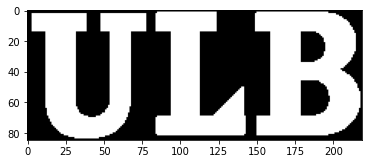

In [2]:
# -- Your code here -- #
watermark = imread('watermark.png').astype('int16')
im = imread('etretat.jpg').astype('int16')

plt.imshow(watermark, cmap = cm.gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


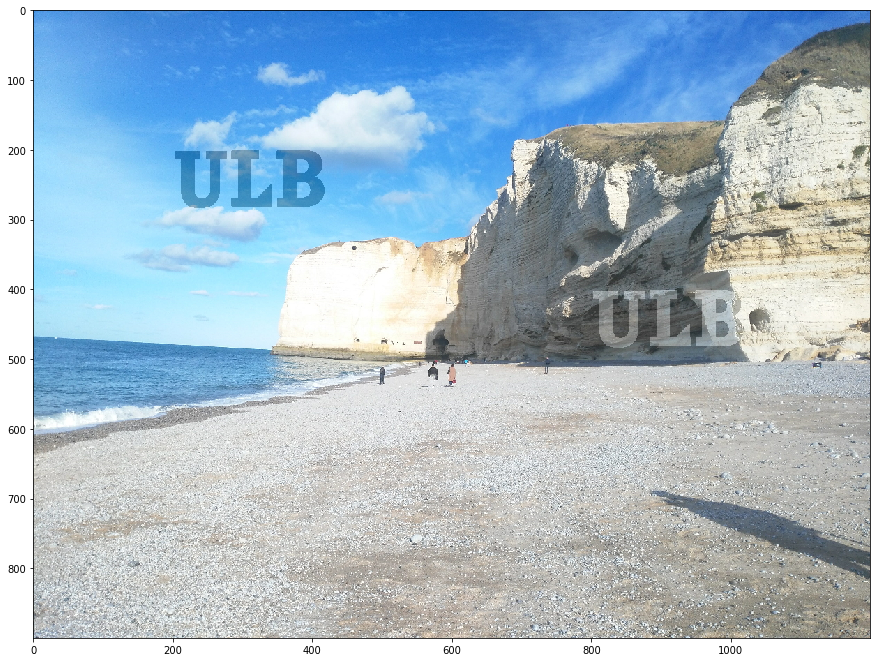

In [4]:
def add_watermark(image, watermark, center, opacity, dynamic_light=False) :
    wy = watermark.shape[0]
    wx = watermark.shape[1]
    
    im2 = image.copy()
    
    hsv = rgb2hsv(image)
    v = hsv[:,:,2]
    for i in range(watermark.shape[0]) :
        for j in range(watermark.shape[1]) :
            if(watermark[i,j] != 0) :
                brightness_darkness_factor = 1 # default value
                
                #  1 if the pixel is dark and need to get brighter, 
                # -1 if the pixel is bright and need to get darker
                
                if dynamic_light :
                    # Need to compute a good brightness threshold
                    t = 0.6
                    brightness_darkness_factor = 1 if v[center[0] + i, center[1] + j]*100 > t else -1
                im2[center[0] + i, center[1] + j] -= brightness_darkness_factor*opacity
    
    return im2



im_with_wm = add_watermark(im, watermark, (400, 800), 60, dynamic_light=True)
im_with_other_wm = add_watermark(im_with_wm, watermark, (200, 200), 60, dynamic_light=True)

plt.figure(figsize=(15,15))
plt.imshow(im_with_other_wm,interpolation='nearest',cmap=cm.gray,vmin=0, vmax=255)
plt.show()